In [47]:
import enum, random, math
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1


def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

In [ ]:
both_girl = 0
older_girl = 0
either_girl = 0

random.seed(42)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()

    if older == Kid.GIRL:
        older_girl += 1

    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girl += 1

    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print(f"P(both | older) = {both_girl/older_girl}")
print(f"P(both | either) = {both_girl/either_girl}")

P(both | older) = 0.49640287769784175
P(both | either) = 0.33319919517102614


In [ ]:
def uniform_pdf(x: float) -> float:
    return 1 if x >= 0 and x < 1 else 0


def uniform_cdf(x: float) -> float:
    if x < 0:
        return 0
    elif x < 1:
        return x
    else:
        return 1

In [ ]:
SQRT_TWO_PI = math.sqrt(2 * math.pi)


def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return math.exp(-((x - mu) ** 2) / 2 * sigma**2) / (sigma * SQRT_TWO_PI)

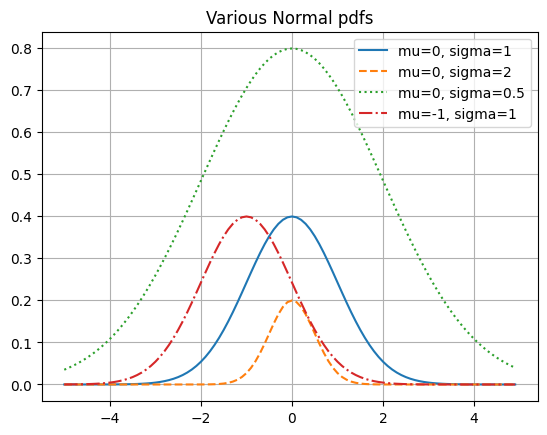

In [40]:
xs = [x / 10 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x) for x in xs], "-", label="mu=0, sigma=1")
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], "--", label="mu=0, sigma=2")
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ":", label="mu=0, sigma=0.5")
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], "-.", label="mu=-1, sigma=1")
plt.legend(loc=1)
plt.title("Various Normal pdfs")
plt.grid()
plt.show()

In [42]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

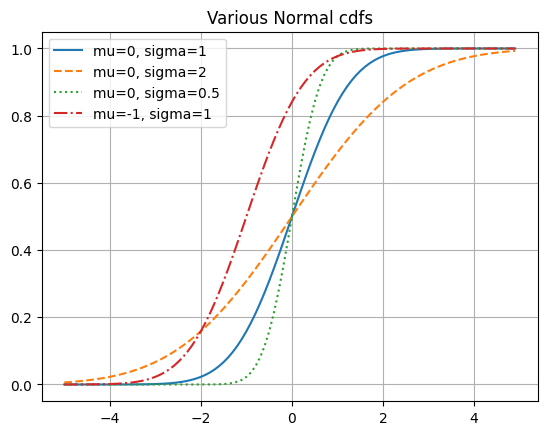

In [44]:
xs = [x / 10 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x) for x in xs], "-", label="mu=0, sigma=1")
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], "--", label="mu=0, sigma=2")
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ":", label="mu=0, sigma=0.5")
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], "-.", label="mu=-1, sigma=1")
plt.legend()
plt.title("Various Normal cdfs")
plt.grid()
plt.show()

In [ ]:
def inverse_normal_cdf(
    p: float, mu: float = 0, sigma: float = 1, tolerance: float = 0.00001
) -> float:
    if mu != 0 and sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10
    hi_z = 10

    while hi_z - low_z > tolerance:
        mid_z = (hi_z + low_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z

    return mid_z

In [69]:
def bernoulli_trial(p: float) -> int:
    return 1 if random.random() < p else 0


def binomial(n: int, p: float) -> int:
    return sum(bernoulli_trial(p) for _ in range(n))

In [70]:
def binomial_histogram(p: float, n: int, num_points: int) -> None:
    data = [binomial(n, p) for _ in range(num_points)]

    histogram = Counter(data)

    plt.bar(
        [x - 0.4 for x in histogram.keys()],
        [v / num_points for v in histogram.values()],
        0.8,
        color="0.75",
    )

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

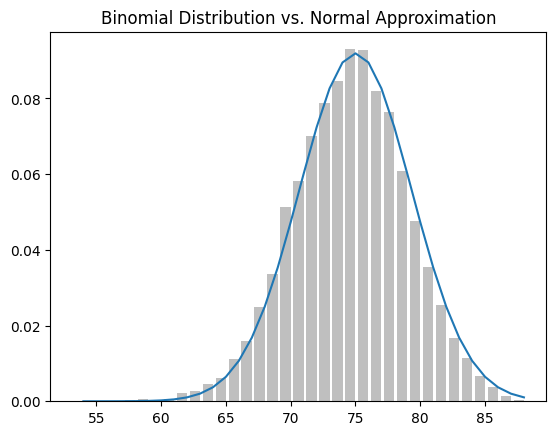

In [71]:
binomial_histogram(0.75, 100, 10000)